# Get Immutable Reference Benchmarks

In [106]:
# select measurement file
file_name = "data/2025-03-09 15-51-49.json"

# plot settings
show_error_bar = False

In [107]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [108]:
from util.convert import convert_datasets
import pandas as pd

heap = convert_datasets(
    raw_data,
    "vNV-Heap",
    [("kvs", "vNV-Heap")],
    ["mean", "min", "max", "options.inner.iterations", "options.inner.object_count", "options.inner.access_type", "options.object_size", "options.inner.kvs_options.page_size", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = convert_datasets(
    raw_data,
    "Paged",
    [("kvs_paged", "Paged")],
    ["mean", "min", "max", "options.inner.iterations", "options.inner.object_count", "options.inner.access_type", "options.object_size", "options.inner.kvs_options.page_size", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = baseline[baseline["options.inner.kvs_options.page_size"].isin([16, 64, 256, 1024, 2048])]

dataset = pd.concat([heap, baseline])
dataset.rename({"options.inner.iterations": "options.iterations"}, axis=1, inplace=True)
dataset.rename({"options.inner.object_count": "options.object_count"}, axis=1, inplace=True)
dataset.rename({"options.inner.access_type": "options.access_type"}, axis=1, inplace=True)
dataset.rename({"options.inner.kvs_options.page_size": "options.page_size"}, axis=1, inplace=True)

dataset["options.access_type"] = dataset["options.access_type"].astype(str)
dataset

[{'mean': 69504739.0, 'min': 69504739, 'max': 69504739, 'options.inner': {'iterations': 1000, 'object_count': 256, 'access_type': 'Random', 'kvs_options': {'max_dirty': 11706}}, 'options.inner.iterations': 1000, 'options.inner.object_count': 256, 'options.inner.access_type': 'Random', 'options.inner.kvs_options': {'max_dirty': 11706}, 'options.inner.kvs_options.max_dirty': 11706, 'options.object_sizes': [32, 128, 256, 1024], 'options.object_count_distribution': [64, 128, 32, 32], 'bench_name': 'kvs', 'machine_name': 'esp32c3', 'cold_start': 0, 'repetitions': 1, 'ticks_per_ms': 16000}, {'mean': 66950871.0, 'min': 66950871, 'max': 66950871, 'options.inner': {'iterations': 1000, 'object_count': 256, 'access_type': 'Sequential', 'kvs_options': {'max_dirty': 11706}}, 'options.inner.iterations': 1000, 'options.inner.object_count': 256, 'options.inner.access_type': 'Sequential', 'options.inner.kvs_options': {'max_dirty': 11706}, 'options.inner.kvs_options.max_dirty': 11706, 'options.object_si

,mean,min,max,options.iterations,options.object_count,options.access_type,options.object_size,options.page_size,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id
0,69504739.0,69504739,69504739,1000,256,Random,NaN,NaN,esp32c3,0,1,16000,vNV-Heap,vNV-Heap,kvs
1,66950871.0,66950871,66950871,1000,256,Sequential,NaN,NaN,esp32c3,0,1,16000,vNV-Heap,vNV-Heap,kvs
2,60038140.0,60038140,60038140,1000,256,"{'Partitioned': {'partition_size': 16, 'access...",NaN,NaN,esp32c3,0,1,16000,vNV-Heap,vNV-Heap,kvs
3,57556732.0,57556732,57556732,1000,256,"{'Distributed': {'key_distribution': [5994238,...",NaN,NaN,esp32c3,0,1,16000,vNV-Heap,vNV-Heap,kvs
0,67036742.0,67036742,67036742,1000,256,Random,NaN,16.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
1,71307241.0,71307241,71307241,1000,256,Sequential,NaN,16.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
2,47892843.0,47892843,47892843,1000,256,"{'Partitioned': {'partition_size': 16, 'access...",NaN,16.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
3,50296767.0,50296767,50296767,1000,256,"{'Distributed': {'key_distribution': [5994238,...",NaN,16.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
8,67251105.0,67251105,67251105,1000,256,Random,NaN,64.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged
9,69772328.0,69772328,69772328,1000,256,Sequential,NaN,64.0,esp32c3,0,1,16000,Paged,Paged,kvs_paged


## Compare the latencies

In [109]:
from util.convert import scale_data
from IPython.display import HTML, display
import numpy as np
from math import isnan

unit = "us"
scaled = scale_data(dataset, unit)
pages_sizes = list(filter(lambda x: not isnan(x), scaled["options.page_size"].unique()))

for access_type in scaled["options.access_type"].unique():
    filtered_access_type = scaled[scaled["options.access_type"] == access_type]

    display(HTML(f"<b>ACCESS TYPE: {access_type}</b>"))

    res = []
    
    for pages_size in pages_sizes:

        right = filtered_access_type[filtered_access_type["options.page_size"] == pages_size]
        left = filtered_access_type[filtered_access_type["options.page_size"].isna()]

        assert(len(left["benchmark_id"].unique()) == 1)
        assert(len(right["benchmark_id"].unique()) == 1)

        a = left["mean"].iloc[0]
        b = right["mean"].iloc[0]
        res.append((pages_size, a,b,(100 * a)/b - 100, (100 * b)/a - 100))

    d = pd.DataFrame(res, columns=["Page size", f"{left["benchmark_id"].iloc[0]} [{unit}]", f"{right["benchmark_id"].iloc[0]} [{unit}]", "% Worse", "% Better"])

    display(d)
    print("Stats:")
    display(d.describe())

,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,16.0,4.344046e+06,4.189796e+06,3.681559,-3.550833
1,64.0,4.344046e+06,4.203194e+06,3.351074,-3.242418
2,256.0,4.344046e+06,6.416074e+06,-32.294331,47.698119
3,1024.0,4.344046e+06,1.776507e+07,-75.547261,308.952136
4,2048.0,4.344046e+06,3.408437e+07,-87.255019,684.622571


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,5.00000,5.000000e+00,5.000000e+00,5.000000,5.000000
mean,681.60000,4.344046e+06,1.333170e+07,-37.612796,206.895915
std,864.56278,0.000000e+00,1.289436e+07,42.763659,296.828284
min,16.00000,4.344046e+06,4.189796e+06,-87.255019,-3.550833
25%,64.00000,4.344046e+06,4.203194e+06,-75.547261,-3.242418
50%,256.00000,4.344046e+06,6.416074e+06,-32.294331,47.698119
75%,1024.00000,4.344046e+06,1.776507e+07,3.351074,308.952136
max,2048.00000,4.344046e+06,3.408437e+07,3.681559,684.622571


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,16.0,4.184429e+06,4.456703e+06,-6.109295,6.506816
1,64.0,4.184429e+06,4.360770e+06,-4.043805,4.214220
2,256.0,4.184429e+06,4.341343e+06,-3.614404,3.749942
3,1024.0,4.184429e+06,4.344366e+06,-3.681467,3.822179
4,2048.0,4.184429e+06,4.383082e+06,-4.532268,4.747435


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,5.00000,5.000000e+00,5.000000e+00,5.000000,5.000000
mean,681.60000,4.184429e+06,4.377253e+06,-4.396248,4.608118
std,864.56278,0.000000e+00,4.740510e+04,1.024627,1.132893
min,16.00000,4.184429e+06,4.341343e+06,-6.109295,3.749942
25%,64.00000,4.184429e+06,4.344366e+06,-4.532268,3.822179
50%,256.00000,4.184429e+06,4.360770e+06,-4.043805,4.214220
75%,1024.00000,4.184429e+06,4.383082e+06,-3.681467,4.747435
max,2048.00000,4.184429e+06,4.456703e+06,-3.614404,6.506816


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,16.0,3752383.75,2.993303e+06,25.359315,-20.229303
1,64.0,3752383.75,2.841986e+06,32.033834,-24.261838
2,256.0,3752383.75,3.666554e+06,2.340890,-2.287346
3,1024.0,3752383.75,5.637815e+06,-33.442588,50.246227
4,2048.0,3752383.75,7.127507e+06,-47.353492,89.946123


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,5.00000,5.00,5.000000e+00,5.000000,5.000000
mean,681.60000,3752383.75,4.453433e+06,-4.212408,18.682773
std,864.56278,0.00,1.864226e+06,35.166672,49.681112
min,16.00000,3752383.75,2.841986e+06,-47.353492,-24.261838
25%,64.00000,3752383.75,2.993303e+06,-33.442588,-20.229303
50%,256.00000,3752383.75,3.666554e+06,2.340890,-2.287346
75%,1024.00000,3752383.75,5.637815e+06,25.359315,50.246227
max,2048.00000,3752383.75,7.127507e+06,32.033834,89.946123


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
0,16.0,3597295.75,3.143548e+06,14.434258,-12.613581
1,64.0,3597295.75,2.943239e+06,22.222335,-18.181894
2,256.0,3597295.75,4.478404e+06,-19.674603,24.493627
3,1024.0,3597295.75,1.447137e+07,-75.141989,302.284796
4,2048.0,3597295.75,3.055233e+07,-88.225788,749.313728


Stats:


,Page size,kvs [us],kvs_paged [us],% Worse,% Better
count,5.00000,5.00,5.000000e+00,5.000000,5.000000
mean,681.60000,3597295.75,1.111778e+07,-29.277157,209.059335
std,864.56278,0.00,1.186846e+07,50.580674,329.927171
min,16.00000,3597295.75,2.943239e+06,-88.225788,-18.181894
25%,64.00000,3597295.75,3.143548e+06,-75.141989,-12.613581
50%,256.00000,3597295.75,4.478404e+06,-19.674603,24.493627
75%,1024.00000,3597295.75,1.447137e+07,14.434258,302.284796
max,2048.00000,3597295.75,3.055233e+07,22.222335,749.313728


# Final Plots

/tmp/ipykernel_45792/232059423.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paged_data["cmp"] = 0
/tmp/ipykernel_45792/232059423.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.96449167 0.96757582 1.47698119 4.08952136 7.84622571]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  paged_data.loc[paged_data["options.access_type"] == access_type, "cmp"] = paged_data.loc[paged_data["options.access_type"] == access_type, "mean"] / vnv_heap_data.loc[paged_data["options.access_type"] == access_type, "mean"].iloc[0]
/tmp/ipykernel_45792/232059423.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of

[<matplotlib.lines.Line2D object at 0x7f8055bd9790>, [<matplotlib.patches.Patch object at 0x7f8056d5e8d0>, <matplotlib.patches.Patch object at 0x7f8054cc4b60>, <matplotlib.patches.Patch object at 0x7f8056d342f0>, <matplotlib.patches.Patch object at 0x7f8056d378c0>, <matplotlib.patches.Patch object at 0x7f8056d36f90>, <matplotlib.patches.Patch object at 0x7f8056d368d0>, <matplotlib.patches.Patch object at 0x7f8056d365d0>, <matplotlib.patches.Patch object at 0x7f805acc5430>, <matplotlib.patches.Patch object at 0x7f80545b34a0>, <matplotlib.patches.Patch object at 0x7f805a434320>, <matplotlib.patches.Patch object at 0x7f805a434380>, <matplotlib.patches.Patch object at 0x7f805a437b90>, <matplotlib.patches.Patch object at 0x7f805a437290>, <matplotlib.patches.Patch object at 0x7f805a4344a0>, <matplotlib.patches.Patch object at 0x7f805a437f80>, <matplotlib.patches.Patch object at 0x7f8057ce7b00>, <matplotlib.patches.Patch object at 0x7f807e8e6db0>, <matplotlib.patches.Patch object at 0x7f805b5

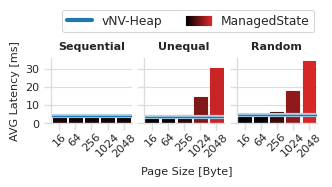

In [110]:
from util.plot import set_theme, save_plot
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerTuple
import math

palette = set_theme(colors=2)

unit = "ms"
scaled_data = scale_data(dataset, unit)
scaled_data = scaled_data.copy()

# calculate average update latency
scaled_data["mean"] /= scaled_data["options.iterations"]

# change labels
scaled_data.loc[scaled_data["options.access_type"].str.contains("Partitioned"), "options.access_type"] = "Partitioned"
scaled_data.loc[scaled_data["options.access_type"].str.contains("Distributed"), "options.access_type"] = "Unequal"


vnv_heap_data = scaled_data[scaled_data["benchmark_id"] == "kvs"]
paged_data = scaled_data[scaled_data["benchmark_id"] == "kvs_paged"]
paged_data["cmp"] = 0
for access_type in paged_data["options.access_type"].unique():
    paged_data.loc[paged_data["options.access_type"] == access_type, "cmp"] = paged_data.loc[paged_data["options.access_type"] == access_type, "mean"] / vnv_heap_data.loc[paged_data["options.access_type"] == access_type, "mean"].iloc[0]

# make options.page_size int
paged_data["options.page_size"] = paged_data["options.page_size"].astype(int)

# change labels
paged_data["benchmark_title"] = "ManagedState"

# sort
access_types = ["Sequential", "Unequal", "Random"]
paged_data["options.access_type"] = pd.Categorical(paged_data["options.access_type"], access_types)
paged_data = paged_data.sort_values(by=["options.access_type"])


g = sns.catplot(
    data=paged_data,
    kind="bar",
    x="options.page_size", y="mean", hue="benchmark_title", col="options.access_type",
    col_wrap=4,
    errorbar="sd", alpha=1, aspect=(1/1.6)*(3.3/3) - (1/3) * 0.05, height=1.6, width=0.8,
    sharey=True,
)
g.set_titles("{col_name}")
g.set(xlabel=None, ylabel=f"AVG Latency [{unit}]")
g.tight_layout(pad=0)
g.legend.set_title("\nMeasurement")

def format_float(value, pos):
    if value == int(value) and not value == 1:
        return str(int(value))
    else:
        return str(value)

for (ax, access_type) in zip(g.axes, access_types):
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")
    ax.yaxis.set_major_formatter(FuncFormatter(format_float))
    
    height = vnv_heap_data[vnv_heap_data["options.access_type"] == access_type]["mean"].iloc[0]
    
    ax.axhline(y=height, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=3)
    ax.axhline(y=height, color=palette[1], linewidth=1)
    # set bar colors depending on height
    for bar in ax.patches:
        if bar.get_height() < height:
            bar.set_color("black")
        else:
            bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - height)/float(paged_data["mean"].max() - height))))
    
    # barlabels = ax.bar_label(ax.containers[0], labels=paged_data.loc[paged_data["options.access_type"] == access_type, "cmp"].map('x{:,.1f}'.format), rotation=90, padding=4, color="black", fontsize=6)
    # for (label, cmp) in zip(barlabels, list(paged_data.loc[paged_data["options.access_type"] == access_type, "cmp"])):
    #     label.set_x(1.5)
    #     if cmp > 5:
    #         label.set_y(-15)
    #         label.set_fontweight("bold")
    #         label.set_color("white")

#axins = zoomed_inset_axes(g.axes[1], 2, loc=1) # zoom = 6
g.figure.supxlabel("Page Size [Byte]", x=0.335, y=0.08, fontsize=8)
g.tight_layout(w_pad=0, h_pad=0)
g.legend.set(visible=False)

g.axes[0].set_yticks([0, 10, 20, 30])

(_, legend_labels) = g.axes[-1].get_legend_handles_labels()
cmap_gradient = sns.blend_palette(["black", palette[0]], as_cmap=True)(np.linspace(0, 1, 100))

legend_handles = []

legend_handles.append([patches.Patch(facecolor=c, edgecolor=c, label=legend_labels[0]) for c in cmap_gradient])

legend_handles.insert(0, Line2D([0], [0], color=palette[1], lw=3))
legend_labels.insert(0, "vNV-Heap")
print(legend_handles, legend_labels)
plt.legend(
    handles = legend_handles,
    labels = legend_labels,
    loc = "lower center",
    bbox_to_anchor=(-0.6, 1.3),
    ncol=2,
    title=None,
    frameon=True,
    handler_map={list: HandlerTuple(ndivide=None, pad=0)}
)

save_plot(f"kvs", False)

# Compare Metadata Usage

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from util.plot import set_theme
import math

def plot_chunks(ax: plt.Axes, objs: list, unused_ram: int = 0):
    obj_cnt = sum(map(lambda x: x[0], objs))
    raw_obj_size = sum(map(lambda x: x[0]*x[1], objs))

    print("-- plotting chunks")
    print("obj cnt is:", obj_cnt)
    print("raw obj size is:", raw_obj_size)
    print("unused ram is:", unused_ram)

    palette = set_theme(colors=2)

    page_sizes = list(map(int, filter(lambda x: not math.isnan(x), dataset["options.page_size"].unique())))
    page_counts = list(map(lambda size: int(math.ceil(float(raw_obj_size + unused_ram) / float(size))), page_sizes))

    
    labels = list(map(lambda _: "ManagedState", page_sizes))

    vnv_heap_line = obj_cnt / 1000
    data = pd.DataFrame({ "page_sizes": page_sizes, "page_counts": page_counts, "labels": labels, "cmp": list(map(lambda x: (x/1000) / vnv_heap_line, page_counts)) })

    # scale: 1k
    data["page_counts"] /= 1000

    sns.barplot(
        data=data,
        ax=ax,
        x="page_sizes", y="page_counts",
        errorbar="sd", alpha=1,
        width=0.7
    )

    ax.set_xlabel("Page Size [Byte]")
    ax.set_ylabel("# Managed Chunks [k]")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_yticks(list(range(5)))
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")

    ax.axhline(y=vnv_heap_line, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=3)
    ax.axhline(y=vnv_heap_line, color=palette[1], linewidth=1)

    for bar in ax.patches:
        if bar.get_height() < vnv_heap_line:
            bar.set_color("black")
        else:
            bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - vnv_heap_line)/(data["page_counts"].max() - vnv_heap_line))))

  
    # barlabels = ax.bar_label(ax.containers[0], labels=data["cmp"].map('x{:,.1f}'.format), rotation=90, padding=4, color="black", fontsize=6)
    # for (label, cmp) in zip(barlabels, list(data["cmp"])):
    #     label.set_x(1.5)
    #     if cmp > 5:
    #         label.set_y(-19)
    #         label.set_fontweight("bold")
    #         label.set_color("white")
    #     elif cmp < 0.5:
    #         label.set_y(6)
            


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from util.plot import set_theme
import math

metadata_paged_per_page = 1
metadata_heap_per_object = 4


def plot_metadata_usage(ax: plt.Axes, objs: list, unused_ram: int = 0):
    obj_cnt = sum(map(lambda x: x[0], objs))
    raw_obj_size = sum(map(lambda x: x[0]*x[1], objs))

    print("-- plotting metadata usage")
    print("obj cnt is:", obj_cnt)
    print("raw obj size is:", raw_obj_size)
    print("unused ram is:", unused_ram)

    palette = set_theme(colors=2)

    page_sizes = list(map(int, filter(lambda x: not math.isnan(x), dataset["options.page_size"].unique())))
    page_counts = list(map(lambda size: int(math.ceil(float(raw_obj_size + unused_ram) / float(size))), page_sizes))
    metadata_sizes = list(map(lambda cnt: cnt * metadata_paged_per_page, page_counts))
    labels = list(map(lambda _: "ManagedState", page_sizes))

    vnv_heap_line = (obj_cnt * metadata_heap_per_object) / 1000
    data = pd.DataFrame({ "page_sizes": page_sizes, "page_counts": page_counts, "metadata_sizes": metadata_sizes, "labels": labels, "cmp": list(map(lambda x: (x/1000) / vnv_heap_line, metadata_sizes)) })

    # scale: k
    data["metadata_sizes"] /= 1000

    sns.barplot(
        data=data,
        ax=ax,
        x="page_sizes", y="metadata_sizes",
        errorbar="sd", alpha=1,
        width=0.7
    )

    ax.set_xlabel("Page Size [Bytes]")
    ax.set_ylabel("Metadata [kB]")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_yticks(list(range(5)))
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")

    ax.axhline(y=vnv_heap_line, color=sns.blend_palette(["white", palette[1]], n_colors=4)[1], linewidth=3)
    ax.axhline(y=vnv_heap_line, color=palette[1], linewidth=1)

    for bar in ax.patches:
        if bar.get_height() < vnv_heap_line:
            bar.set_color("black")
        else:
            bar.set_color(sns.blend_palette(["black", palette[0]], as_cmap=True)(math.sqrt(float(bar.get_height() - vnv_heap_line)/(data["metadata_sizes"].max() - vnv_heap_line))))


    # barlabels = ax.bar_label(ax.containers[0], labels=data["cmp"].map('x{:,.1f}'.format), rotation=90, padding=4, color="black", fontsize=6)
    # for (label, cmp) in zip(barlabels, list(data["cmp"])):
    #     label.set_x(1.5)
    #     if cmp > 5:
    #         label.set_y(-19)
    #         label.set_fontweight("bold")
    #         label.set_color("white")
    #     elif cmp < 0.5:
    #         label.set_y(6)
            


-- plotting chunks
obj cnt is: 256
raw obj size is: 59392
unused ram is: 0
-- plotting metadata usage
obj cnt is: 256
raw obj size is: 59392
unused ram is: 0


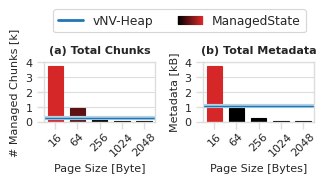

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from util.plot import set_theme
import math
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerTuple

objs = [(64, 32), (128, 128), (32, 256), (32, 1024)]
unused_ram = 0

(fig, axes) = plt.subplots(1, 2, figsize=(3.3, 3.3*0.45))


plot_chunks(axes[0], objs, unused_ram)
plot_metadata_usage(axes[1], objs, unused_ram)

axes[0].set_title("(a) Total Chunks", fontweight="bold")
axes[1].set_title("(b) Total Metadata", fontweight="bold")


cmap_gradient = sns.blend_palette(["black", palette[0]], as_cmap=True)(np.linspace(0, 1, 100))


legend_handles = []
legend_labels = []

legend_handles.append(Line2D([0], [0], color=palette[1], lw=2))
legend_labels.append("vNV-Heap")

legend_labels.append("ManagedState")
legend_handles.append([patches.Patch(facecolor=c, edgecolor=c, label="test") for c in cmap_gradient])


fig.legend(
    handles = legend_handles,
    labels = legend_labels,
    loc = "lower center",
    bbox_to_anchor=(0.55, 0.97),
    ncol=2,
    title=None,
    frameon=True,
    handler_map={list: HandlerTuple(ndivide=None, pad=0)}
)

fig.tight_layout()

# plot_metadata_size([(16+8, 32), (32+16, 128), (32, 256), (16, 1024), (8, 4096)], unused_ram=0)
# plot_metadata_size([((32+32)/2, 32), ((64+32)/2, 128), (64/2, 256), (16/2, 1024), (0/2, 4096)], unused_ram=0)
save_plot(f"kvs_chunks", False)